
## Normality defined

Data is described as "normal," or "normally distributed," if most values cluster in the center of the range, with the rest tapering off symmetrically to the left and the right. The mean and median of a normally distributed variable are equal.  The information in a normal distribution can be summarized by the mean μ ("mu") and standard deviation σ ("sigma").  The probability density function for a normally distributed variable is:

\begin{equation}
f(x|\mu,\sigma^2)=\frac1{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation} 

e is [Euler’s number](http://mathforum.org/dr.math/faq/faq.e.html) (e=2.71828…), a mathematical constant.

While you don’t need to memorize the probability density function to work with normally distributed variables, it is good to be able to recognize it if you come across it while reading about other statistical concepts.

The normal distribution is useful for data scientists because:

 * It is easily summarized using just two statistics (mean and standard deviation).
 * The area under the curve is 1, making it easy to calculate the probability of individual outcomes within the distribution.
 * It describes many natural phenomena, such as blood pressure, height, weight, etc.
 * In general, any variable that measures an outcome produced by many small effects acting additively and independently will have a close to normal distribution.
 * Lots of common scores (percentiles, z-scores) and statistical tests (t-tests, ANOVAs, bell-curve grading) assume a normal distribution.

We can use Python to generate a normally distributed variable by providing a mean and standard deviation, which we graph as a histogram.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

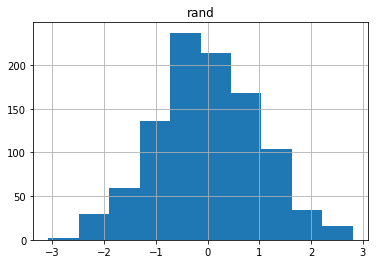

In [0]:
# Making a standard normally distributed variable with 1000 observations, a mean of 0, and 
# a standard deviation of 1, and putting it in a data frame.
mean = 0 
sd = 1
n = 1000

# Create a DataFrame of one column rand,
# containing random numbers following normal 
# distribution

df = pd.DataFrame({'rand': np.random.normal(mean, sd, n)})

# Plotting the variables in the data frame (here, just the variable "rand") as a histogram.
df.hist()
# Inline printing the histogram
plt.show()

Approximately 68% of the values in a normally-distributed variable fall within 1 standard deviation above or below the mean, 95% of values fall within two standard deviations of the mean, and 99.7% of values fall within three standard deviations of the mean. This is called the "empirical rule" of statistics.


## When does it break? Deviations from normality and descriptive statistics

Unfortunately, the usefulness of the normal distribution means that it oftentimes becomes the "default" distribution in people’s minds. This isn’t helped by the fact that it is called "normal"!  Real data (as opposed to idealized mathematical concepts) is never perfectly normal, but some data is more normal than others.  When statistics that assume normality are used on non-normal data, the mismatch between statistics and data can result in inaccurate conclusions.

While there are statistical tests of non-normality, they are sensitive to sample size, meaning that whether or not the test says your data is normal has more to do with how much data you have than the distribution of your data.  Instead, the best method of deciding if your data is normal is to inspect the data visually using histograms and quantile-quantile (QQ) plots.

QQ plots graph a variable with an unknown distribution against a variable with a known distribution.  Values for each variable are sorted into ascending order, then plotted against each other with the known variable as the x-axis and the unknown variable as the y-axis.   If the mystery variable shares the same distribution as the known variable, the result should be a straight line running from the lower left-hand corner to the upper right-hand corner of the plot.  Deviations from the straight line indicate that the data does not fit the distribution.  

Let’s try a QQ plot to check if data is normally distributed:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Making two variables.
rand1 = np.random.normal(50, 300, 1000)
rand2 = np.random.poisson(1, 1000)

# Sorting the values in ascending order.
rand1.sort()
rand2.sort()

# Making a standard normally distributed variable with 1000 observations,
# a mean of 0, and standard deviation of 1 that we will use as our “comparison.”
norm = np.random.normal(0, 1, 1000)

# Sorting the values in ascending order.
norm.sort()

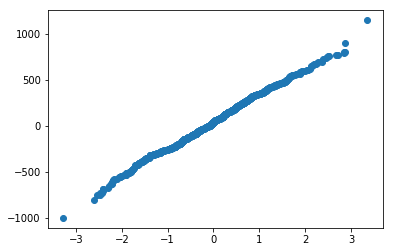

In [0]:
# Plotting the variable rand1 against norm in qqplots.
plt.plot(norm, rand1, "o") 
plt.show() 

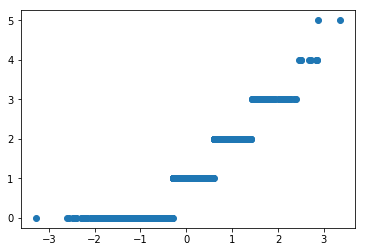

In [0]:
# Plotting the variable rand2 against norm in qqplots.
plt.plot(norm, rand2, "o") 
plt.show()

Looking at the QQ plot, it is clear that the values of "rand1" are normally distributed, while the values of "rand2" are not normally distributed.  (In fact, "rand2" reflects a different probability distribution, "Poisson," which will be discussed in a later checkpoint.) 

You may notice that with a QQ plot, the scales of the known and unknown variables do not have to match: What matters is the relationships between datapoints within each variable. 

When data is not normal, the mean and standard deviation is no longer accurate or informative summaries.  Let's make histograms of `rand1` and `rand2`, then compute descriptive statistics to see how well they match up.

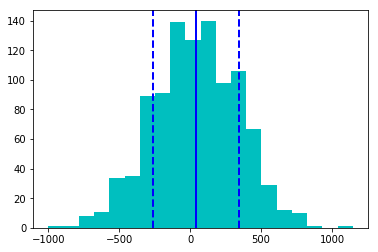

In [0]:
#Plot a histogram for rand1.
plt.hist(rand1, bins=20, color='c')

# Add a vertical line at the mean.
plt.axvline(rand1.mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(rand1.mean() + rand1.std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(rand1.mean()-rand1.std(), color='b', linestyle='dashed', linewidth=2) 

# Print the histogram.
plt.show()

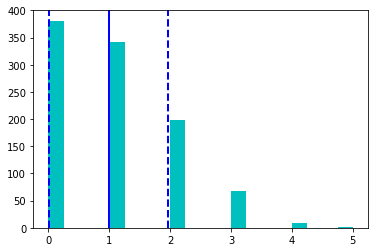

In [0]:
# Plot the same histogram for rand2.
plt.hist(rand2, bins=20, color = 'c')

# Add a vertical line at the mean.
plt.axvline(rand2.mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(rand2.mean() + rand2.std(), color='b', linestyle='dashed', linewidth=2)

#Add a vertical line at one standard deviation below the mean.
plt.axvline(rand2.mean() - rand2.std(), color='b', linestyle='dashed', linewidth=2)

# Print the histogram.
plt.show()

Because `rand1` is normal, the mean is placed where the data clusters, with approximately 50% of the data falling on either side, and approximately 67% of the data falling within one standard deviation of the mean.  For `rand2`, the mean is still placed where the data clusters, but the cluster is not centered, and the standard deviation does not encompass the same amount of data on each side of the mean.  Put another way, for `rand2` the mean is no longer a measure of "central" tendency, as it does not fall in the center, and the standard deviation no longer describes how much variance there is.  Asymmetric probability distributions are described as "skewed."

## Other distributions

So far, we’ve categorized data as either “normal” or “non-normal,” but there are many other probability distributions that also have useful characteristics for addressing particular statistical problems.  We won’t review all of them (see here for a [more comprehensive list](https://www.causascientia.org/math_stat/Dists/Compendium.pdf)) but here are brief introductions to some of the most common.

### Bernoulli

The **Bernoulli distribution** represents two possible outcomes of an event (such as a coin flip). Summarized by _p_, the probability of the outcome _k_.

The probability mass function for the Bernoulli distribution is:


\begin{equation}
  f(k|p)=\left\{
  \begin{array}{@{}ll@{}}
    p, & \text{if}\ k=1 \\
    1-p, & \text{if}\ k=0
  \end{array}\right.
\end{equation} 


Note that when a distribution is discrete (only takes integers), it has a probability _mass_ function, while a continuous distribution has a probability _density_ function.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

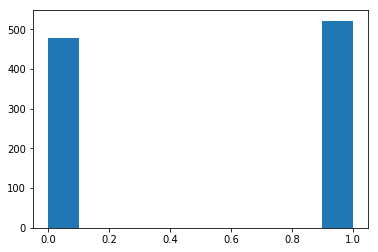

In [0]:
# Generate a bernoulli distribution with p =0.5.
bernoulli= np.random.binomial(1, .5, 1000)

#Plot a histogram.
plt.hist(bernoulli)

# Print the histogram
plt.show()

### Binomial:
A **binomial distribution** counts the number of successes when an event with two or more distinct possible outcomes is repeated many times (such as many coin flips or die tosses).  Summarized by _p_, the probability of getting _k_ successes during _n_ repetitions of the event.  The probability mass function is:

\begin{equation}
f(k| n,p)= \left(
  \begin{array}{@{}ll@{}}
    n \\
    k
  \end{array}\right) p^k (1-p)^{(n-k)}
\end{equation}

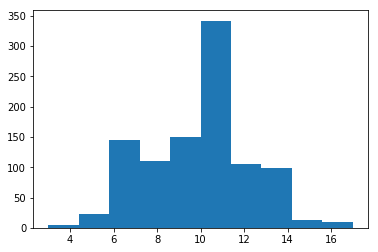

In [0]:
# Generate a binomial distribution with n=20 and p=0.5.
binomial = np.random.binomial(20, 0.5, 1000)

# Plot a histogram.
plt.hist(binomial)

# Print the histogram.
plt.show()

### Gamma
The **gamma distribution** represents the time until an event (such as lifespan until death), when the event starts out unlikely (few people die in youth), becomes more likely (more people die in old age), then becomes less likely again (few people die in extreme old age because most have already died).  Summarized by a shape parameter ($\alpha$) and an inverse-scale parameter ($\beta$). The probability density function is:

\begin{equation}
f(x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}} {\Gamma(\alpha)} \text {for } x \ge 0 \text { and } \alpha,\beta \ge0
\end{equation} 

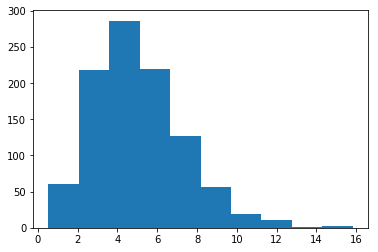

In [0]:
# Generate a gamma distribution with shape =5 and scale = 1
gamma = np.random.gamma(5,1, 1000)

# Plot a histogram.
plt.hist(gamma)

# Print the histogram.
plt.show()

### Poisson

The **poisson distribution** represents the number of times a given event (such as a phone call to a radio show) will occur during a given time interval.  Data can range from 0 (no phone calls during the time period) to approaching infinity (the phone never stopped ringing during the time period).  Summarized by $\lambda$ (“lambda”), the rate that events occur during a given time period.  The probability mass function is:

\begin{equation}
f(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
\end{equation} 



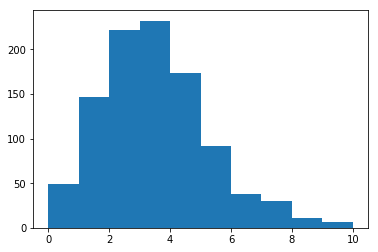

In [0]:
# Generate a Poisson distribution with lambda = 3
poisson = np.random.poisson(3, 1000)

# Plot a histogram.
plt.hist(poisson)

# Print the histogram.
plt.show()

Identifying whether data has a distribution with known statistical properties requires visualizing the data through histograms and QQ plots, as well as knowing the source of the data (counts, probabilities, times, etc). When collecting and exploring new data as a data scientist you’ll make heavy use of visualizations like the ones we use above.

## Conditional Distribution

Distributions can also be conditional. Consider an ecommerce site. For all of the customers, we  have a distribution of the amount that they have spent on the website. It may look something like this:

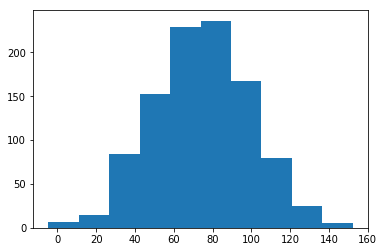

In [0]:
# Creating a data frame to hold the simulated ecommerce data, and populating it with a
# normally distributed variable with mean 75 and standard deviation 25.

ecommerce = pd.DataFrame()
ecommerce['spending'] = np.random.normal(75, 25, 1000)

# Plot a histogram.
plt.hist(ecommerce['spending'])
plt.show()

But let's say we're actually interested in a subset of that population, for instance visitors who visited the site more than twice. That data may look like this:


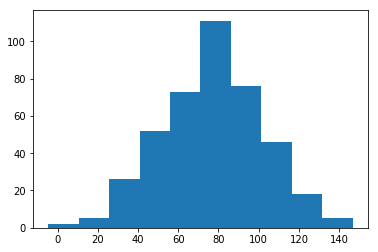

In [0]:
# Adding a variable with counts of number of times visiting the site.
ecommerce['visit_count'] = np.random.randint(0, 5, 1000)

# Selecting only the cases where the visit count is greater than two and plotting those.
plt.hist(ecommerce[ecommerce['visit_count'] > 2]['spending'])
plt.show()

This is a conditional distribution, with the condition being that the user visited more than twice. [This is an example of how we can use information about one aspect of a data set to inform another.](http://xkcd.com/795/)